In [1]:
# 1.Importing all the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import randint
import re
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk import FreqDist
from nltk.corpus import stopwords 
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import neighbors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from tensorflow import keras
from keras.utils import to_categorical
import warnings
import seaborn as sns
from sklearn.metrics import classification_report
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D, CuDNNLSTM, concatenate
from keras.layers import Bidirectional, GlobalMaxPool1D, Dropout, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model
warnings.filterwarnings("ignore")

Using TensorFlow backend.
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

# Text Processing-Removing stop words,Tokenization 

In [2]:
#function to remove  stopwords
english_stop_words = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ''.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    removed_stop_words = list(filter(lambda x: x != '', removed_stop_words))
    return removed_stop_words


def clean_data(review):
    review = review.lower() # convert text to lower-case
    review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', review) # remove URLs
    review = re.sub('@[^\s]+', 'AT_USER', review) # remove usernames
    review = re.sub(r'#([^\s]+)', r'\1', review) # remove the # in #hashtag
    review = re.sub(r'\W', ' ', review) # Remove all the special characters
    review= re.sub(r'\s+[a-zA-Z]\s+', ' ', review)  # remove all single characters  
    review = re.sub(r'\^[a-zA-Z]\s+', ' ', review)  # Remove single characters from the start
    review = re.sub(r'\s+', ' ', review, flags=re.I)# Substituting multiple spaces with single space
    review =  re.sub(r"\d", "", review) #Removing Digits
    review = re.sub(r"^\s+", "", review) #Removing Spaces from Start and End
    review = word_tokenize(review)
    review = remove_stop_words(review) #remove stop words
    review = ' '.join(review)
    return review

# Count Vectorizer with ngrams

In [3]:
def CV_ngrams(X_train,X_test):
    count_vectorizer = CountVectorizer (binary=True, ngram_range=(1, 3))
    count_vectorizer.fit(X)
    train_features_cv = count_vectorizer.transform(X_train)
    test_features_cv = count_vectorizer.transform(X_test)
    return train_features_cv,test_features_cv

# Count Vectorizer 

In [4]:
def Count_Vectorizer(X_train,X_test):
    count_vectorizer = CountVectorizer()
    count_vectorizer.fit(X)
    train_features_cv = count_vectorizer.transform(X_train)
    test_features_cv = count_vectorizer.transform(X_test)
    return train_features_cv,test_features_cv

# TF-IDF

In [5]:
def tfidf(X_train,X_test):    
    vectorizer = TfidfVectorizer ()
    vectorizer.fit(X)
    train_features_cv = vectorizer.transform(X_train)
    test_features_cv = vectorizer.transform(X_test)
    return train_features_cv,test_features_cv

# Confusion Matrix

In [6]:
def confusion_matrix(cnf_matrix):    
    class_names=[0,1,2] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    return 



In [7]:
def plotting(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()   

# DRUGS.Com - Train Data

In [8]:
drugsCom_path = 'drugsCom_raw.csv'
drugsCom_data = pd.read_csv(drugsCom_path)
for i in range(len(drugsCom_data)):
    if((pd.isnull(drugsCom_data.review[i])) == True):
        drugsCom_data = drugsCom_data.drop([i])
    elif((pd.isnull(drugsCom_data.rating[i])) == True):
        drugsCom_data = drugsCom_data.drop([i])  
drugsCom_data['rating_label'] = drugsCom_data.rating.apply(lambda x : 0 if x <= 4 else (1 if x in range(5,7) else 2))
drugsCom_data.drop(["drugID","drugName","condition","date","rating","usefulCount"],axis=1,inplace=True)
drugsCom_data['review_clean_data'] = drugsCom_data.review.apply(clean_data)
X_train = drugsCom_data["review_clean_data"].values
y_train = drugsCom_data["rating_label"].values
print("Shape of drugsCom_data data: ",drugsCom_data.shape)

Shape of drugsCom_data data:  (215063, 3)


# DRUGLIB - Test Data

In [9]:
drugLib_path = 'drugLib_raw.csv'
drugLib_data = pd.read_csv(drugLib_path)
for i in range(len(drugLib_data)):
    if((pd.isnull(drugLib_data.effectiveness[i])) == True):
        drugLib_data = drugLib_data.drop([i])
    elif((pd.isnull(drugLib_data.sideEffects[i])) == True):
        drugLib_data = drugLib_data.drop([i])
    elif((pd.isnull(drugLib_data.benefitsReview[i])) == True):
        drugLib_data = drugLib_data.drop([i])
    elif((pd.isnull(drugLib_data.sideEffectsReview[i])) == True):
        drugLib_data = drugLib_data.drop([i])
    elif((pd.isnull(drugLib_data.commentsReview[i])) == True):
        drugLib_data = drugLib_data.drop([i]) 
    elif((pd.isnull(drugLib_data.rating[i])) == True):
        drugLib_data = drugLib_data.drop([i])        
drugLib_data['effectiveness_class'] = drugLib_data.effectiveness.apply(lambda x : 2 if x in ["Highly Effective","Considerably Effective"] else (1 if x in ["Moderately Effective " , "Marginally Effective"] else 0))
drugLib_data['sideEffects_class'] = drugLib_data.sideEffects.apply(lambda x : 0 if x in ["Extremely Severe Side Effects","Severe Side Effects"] else (1 if x in ["Mild Side Effects" , "Moderate Side Effects"] else 2))
drugLib_data['Total_Reviews'] = drugLib_data["benefitsReview"] + drugLib_data["sideEffectsReview"] + drugLib_data["commentsReview"]
drugLib_data['rating_label'] = drugLib_data.rating.apply(lambda x : 0 if x <= 4 else (1 if x in range(5,7) else 2))
drugLib_data.drop(["DrugID","urlDrugName","condition","commentsReview","rating","effectiveness","sideEffects"],axis=1,inplace=True) 
drugLib_data['rating_clean_data'] = drugLib_data.Total_Reviews.apply(clean_data)
X_test = drugLib_data["rating_clean_data"].values
y_test = drugLib_data["rating_label"].values
print("Shape of drugLib_data data: ",drugLib_data.shape)

Shape of drugLib_data data:  (4133, 7)


# Rating

In [10]:
X = np.concatenate([X_train,X_test])
y = np.concatenate([y_train,y_test])
eff_train_X_tfidf ,eff_test_X_tfidf = tfidf(X_train,X_test)
eff_train_X_cv ,eff_test_X_cv = Count_Vectorizer(X_train,X_test)
eff_train_X_cv_ngrams ,eff_test_X_cv_ngrams = CV_ngrams(X_train,X_test)

Count Vectorizer and KNN
Accuracy: 0.6111783208323252
              precision    recall  f1-score   support

           0       0.34      0.37      0.35       898
           1       0.09      0.03      0.04       440
           2       0.72      0.78      0.75      2795

   micro avg       0.61      0.61      0.61      4133
   macro avg       0.38      0.39      0.38      4133
weighted avg       0.57      0.61      0.59      4133



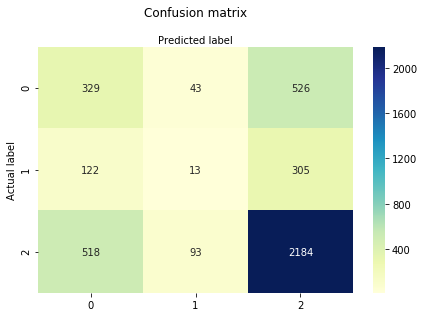

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(eff_train_X_cv,y_train)
y_pred=knn.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer and KNN")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

TFDIF and KNN
Accuracy: 0.6755383498669247
              precision    recall  f1-score   support

           0       0.36      0.01      0.01       898
           1       0.00      0.00      0.00       440
           2       0.68      1.00      0.81      2795

   micro avg       0.68      0.68      0.68      4133
   macro avg       0.34      0.33      0.27      4133
weighted avg       0.54      0.68      0.55      4133



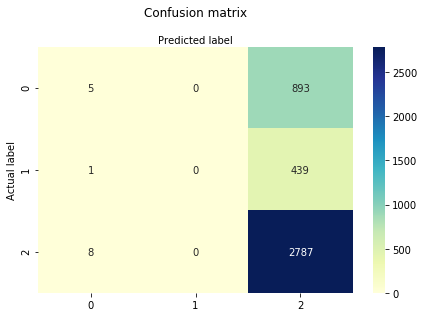

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(eff_train_X_tfidf,y_train)
y_pred=knn.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("TFDIF and KNN")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and KNN
Accuracy: 0.6077909508831357
              precision    recall  f1-score   support

           0       0.32      0.30      0.31       898
           1       0.11      0.03      0.04       440
           2       0.70      0.80      0.75      2795

   micro avg       0.61      0.61      0.61      4133
   macro avg       0.38      0.38      0.37      4133
weighted avg       0.56      0.61      0.58      4133



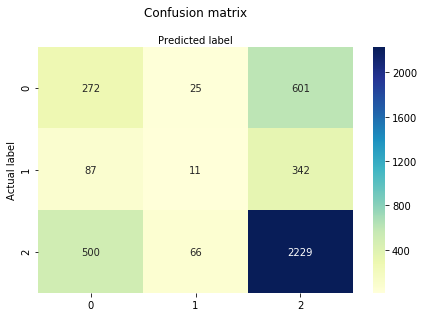

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(eff_train_X_cv_ngrams,y_train)
y_pred=knn.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and KNN")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Logistic Regression
Accuracy: 0.7205419791918704
              precision    recall  f1-score   support

           0       0.59      0.54      0.57       898
           1       0.13      0.05      0.07       440
           2       0.78      0.88      0.83      2795

   micro avg       0.72      0.72      0.72      4133
   macro avg       0.50      0.49      0.49      4133
weighted avg       0.67      0.72      0.69      4133



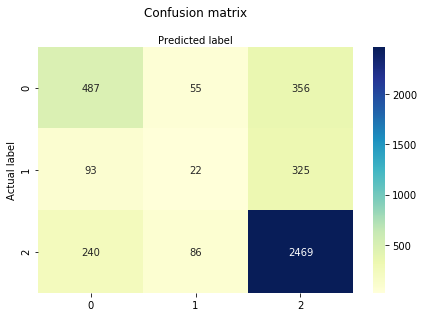

In [13]:
logreg = LogisticRegression()
logreg.fit(eff_train_X_cv,y_train)
y_pred=logreg.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer  and Logistic Regression")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

tfidf and Logistic Regression
Accuracy: 0.750544398741834
              precision    recall  f1-score   support

           0       0.66      0.53      0.59       898
           1       0.12      0.00      0.00       440
           2       0.77      0.94      0.85      2795

   micro avg       0.75      0.75      0.75      4133
   macro avg       0.52      0.49      0.48      4133
weighted avg       0.68      0.75      0.70      4133



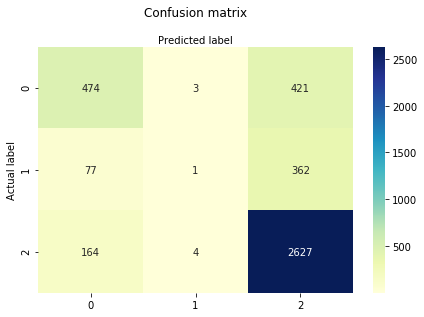

In [14]:
logreg = LogisticRegression()
logreg.fit(eff_train_X_tfidf,y_train)
y_pred=logreg.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("tfidf and Logistic Regression")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Logistic Regression
Accuracy: 0.7609484635857731
              precision    recall  f1-score   support

           0       0.68      0.60      0.64       898
           1       0.13      0.02      0.03       440
           2       0.79      0.93      0.85      2795

   micro avg       0.76      0.76      0.76      4133
   macro avg       0.53      0.52      0.51      4133
weighted avg       0.70      0.76      0.72      4133



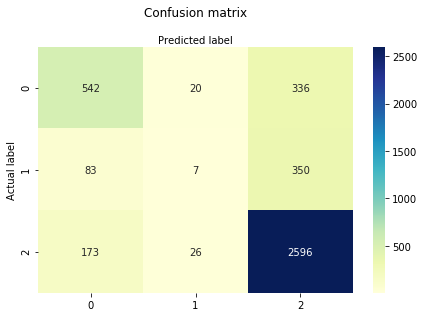

In [15]:
logreg = LogisticRegression()
logreg.fit(eff_train_X_cv_ngrams,y_train)
y_pred=logreg.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and Logistic Regression")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer and Random Forest
Accuracy: 0.7011855794822163
              precision    recall  f1-score   support

           0       0.58      0.27      0.37       898
           1       0.50      0.00      0.00       440
           2       0.72      0.95      0.82      2795

   micro avg       0.70      0.70      0.70      4133
   macro avg       0.60      0.41      0.40      4133
weighted avg       0.66      0.70      0.63      4133



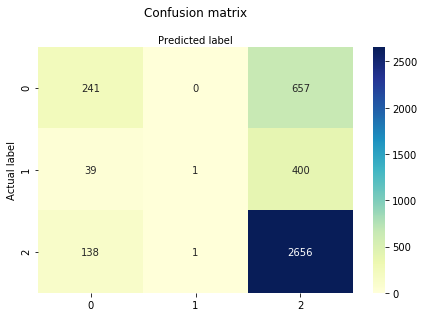

In [10]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(eff_train_X_cv,y_train)
y_pred=forest.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer and Random Forest")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

TFIDF and Random Forest
Accuracy: 0.6965884345511735
              precision    recall  f1-score   support

           0       0.63      0.16      0.26       898
           1       0.00      0.00      0.00       440
           2       0.70      0.98      0.82      2795

   micro avg       0.70      0.70      0.70      4133
   macro avg       0.45      0.38      0.36      4133
weighted avg       0.61      0.70      0.61      4133



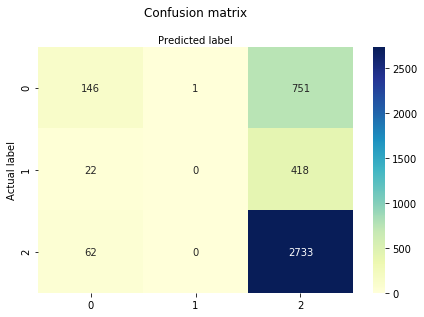

In [11]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(eff_train_X_tfidf,y_train)
y_pred=forest.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("TFIDF and Random Forest")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Random Forest
Accuracy: 0.693926929591096
              precision    recall  f1-score   support

           0       0.73      0.12      0.20       898
           1       0.00      0.00      0.00       440
           2       0.69      0.99      0.81      2795

   micro avg       0.69      0.69      0.69      4133
   macro avg       0.47      0.37      0.34      4133
weighted avg       0.63      0.69      0.59      4133



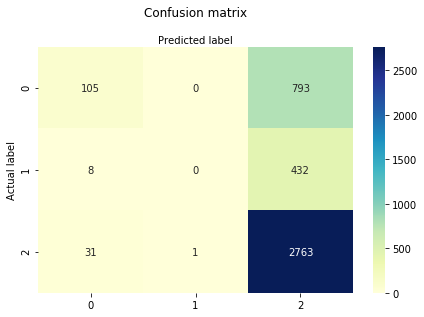

In [12]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(eff_train_X_cv_ngrams,y_train)
y_pred=forest.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and Random Forest")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer and Bagging
Accuracy: 0.6394870554076941
              precision    recall  f1-score   support

           0       0.40      0.47      0.43       898
           1       0.12      0.03      0.05       440
           2       0.74      0.79      0.77      2795

   micro avg       0.64      0.64      0.64      4133
   macro avg       0.42      0.43      0.42      4133
weighted avg       0.60      0.64      0.62      4133



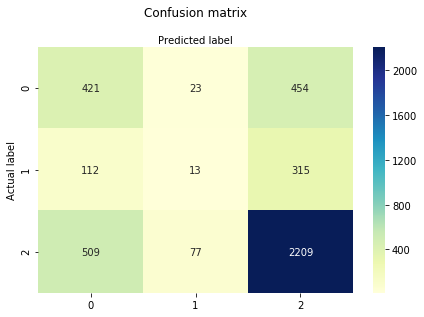

In [13]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
bag.fit(eff_train_X_cv, y_train)
y_pred=bag.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer and Bagging")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

TFIDF and Bagging
Accuracy: 0.6881200096781999
              precision    recall  f1-score   support

           0       0.48      0.43      0.45       898
           1       0.21      0.01      0.03       440
           2       0.74      0.88      0.80      2795

   micro avg       0.69      0.69      0.69      4133
   macro avg       0.48      0.44      0.43      4133
weighted avg       0.63      0.69      0.65      4133



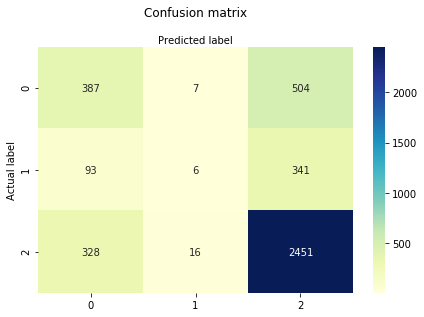

In [14]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
bag.fit(eff_train_X_tfidf, y_train)
y_pred=bag.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("TFIDF and Bagging")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [11]:
tk = Tokenizer(lower = True)
tk.fit_on_texts(X_train)
X_seq_train = tk.texts_to_sequences(X_train)
X_pad_train = pad_sequences(X_seq_train, maxlen=100, padding='post')
tk.fit_on_texts(X_test)
X_seq_test = tk.texts_to_sequences(X_test)
X_pad_test = pad_sequences(X_seq_test, maxlen=100, padding='post')
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
X_pad_train, val_X, y_train_categorical, val_y = train_test_split(X_pad_train, y_train_categorical, stratify=y_train_categorical, test_size=0.1)
vocabulary_size = len(tk.word_counts.keys())+1
max_words = 100
embedding_size = 32
batch_size = 64

W1113 07:51:41.893326  6900 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1113 07:51:41.924236  6900 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1113 07:51:41.935209  6900 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1113 07:51:42.191032  6900 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1113 07:51:42.207914  6900 deprecation_wrapper.py:119] From C:\Users\reshm\Anac

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           1716640   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               186400    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 603       
Total params: 1,903,643
Trainable params: 1,903,643
Non-trainable params: 0
_________________________________________________________________
None


W1113 07:51:42.860463  6900 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 193556 samples, validate on 21507 samples
Epoch 1/10
193556/193556 [==============================] - 551s 3ms/step - loss: 0.8366 - acc: 0.6616 - val_loss: 0.8351 - val_acc: 0.6617
Epoch 2/10
193556/193556 [==============================] - 601s 3ms/step - loss: 0.8355 - acc: 0.6617 - val_loss: 0.8353 - val_acc: 0.6617
Epoch 3/10
193556/193556 [==============================] - 596s 3ms/step - loss: 0.8353 - acc: 0.6617 - val_loss: 0.8361 - val_acc: 0.6618
Epoch 4/10
193556/193556 [==============================] - 625s 3ms/step - loss: 0.7717 - acc: 0.6858 - val_loss: 0.6077 - val_acc: 0.7757
Epoch 5/10
193556/193556 [==============================] - 633s 3ms/step - loss: 0.5610 - acc: 0.7942 - val_loss: 0.5427 - val_acc: 0.8020
Epoch 6/10
193556/193556 [==============================] - 641s 3ms/step - loss: 0.4912 - acc: 0.8186 - val_loss: 0.5004 - val_acc: 0.8135
Epoch 7/10
193556/193556 [==============================] - 607s 3ms/step - loss: 0.4288 - acc: 0.8375 - val_

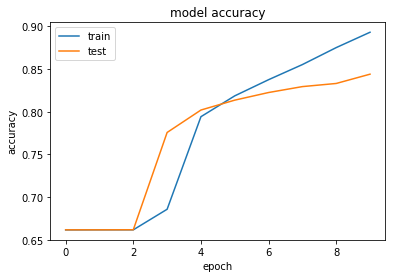

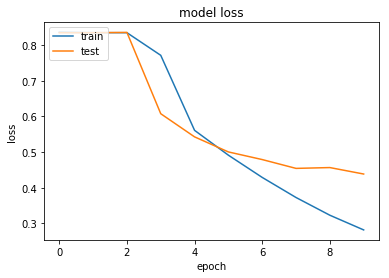

Word Embeddings and LSTM with adam optimiser
Test Accuracy: 56.932011
4133/4133 [==============================] - 1s 232us/step
              precision    recall  f1-score   support

           0       0.29      0.14      0.19       898
           1       0.13      0.00      0.01       440
           2       0.70      0.69      0.69      2795

   micro avg       0.64      0.50      0.56      4133
   macro avg       0.37      0.28      0.30      4133
weighted avg       0.55      0.50      0.51      4133
 samples avg       0.50      0.50      0.50      4133



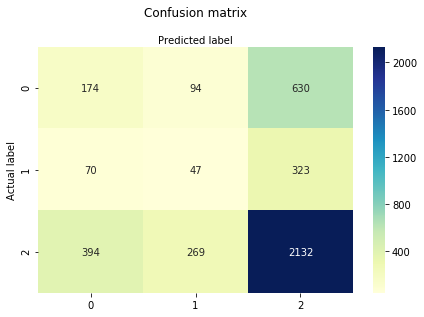

In [13]:
max_words = 100
embedding_size = 32
batch_size = 64
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(200))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_pad_train,y_train_categorical,batch_size = batch_size , epochs = 10,validation_data=(val_X, val_y))
plotting(history)
loss, acc = model.evaluate(X_pad_test,y_test_categorical, verbose=0)
print("Word Embeddings and LSTM with adam optimiser")
print('Test Accuracy: %f' % (acc*100))
y_pred = model.predict([X_pad_test], batch_size=1024, verbose=1)
print(classification_report(y_test_categorical, y_pred.round()))
cnf_matrix = metrics.confusion_matrix(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1))
confusion_matrix(cnf_matrix)

W1204 21:36:35.515971  3460 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1204 21:36:35.542281  3460 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1204 21:36:35.548265  3460 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1204 21:36:35.875926  3460 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1204 21:36:35.884368  3460 deprecation.py:506

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 100)          5364500   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 128)          84480     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                2064      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51  

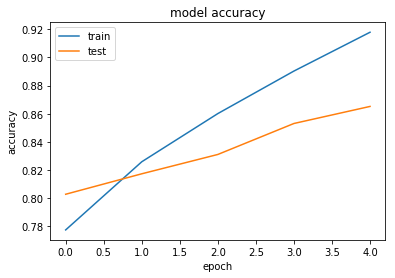

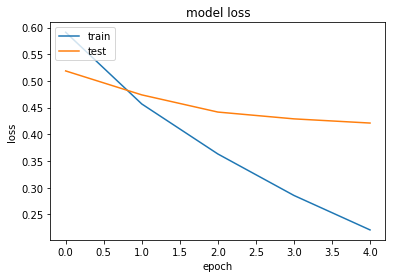

Word Embeddings and LSTM with adam optimiser
Test Accuracy: 57.125575
4133/4133 [==============================] - 1s 244us/step
              precision    recall  f1-score   support

           0       0.26      0.17      0.21       898
           1       0.00      0.00      0.00       440
           2       0.70      0.71      0.71      2795

   micro avg       0.63      0.52      0.57      4133
   macro avg       0.32      0.30      0.31      4133
weighted avg       0.53      0.52      0.52      4133
 samples avg       0.52      0.52      0.52      4133



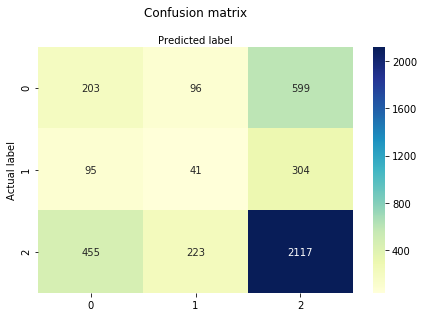

In [12]:
embed_size = 100
inp = Input(shape=(100,))
x = Embedding(vocabulary_size, embed_size)(inp)

x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(3, activation="sigmoid")(x)
model_biLSTM = Model(inputs=inp, outputs=x)
model_biLSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_biLSTM.summary())
history = model_biLSTM.fit(X_pad_train,y_train_categorical,batch_size = batch_size , epochs = 5,validation_data=(val_X, val_y))
plotting(history)
loss, acc = model_biLSTM.evaluate(X_pad_test,y_test_categorical, verbose=0)
print("Word Embeddings and LSTM with adam optimiser")
print('Test Accuracy: %f' % (acc*100))
y_pred = model_biLSTM.predict([X_pad_test], batch_size=1024, verbose=1)
print(classification_report(y_test_categorical, y_pred.round()))
cnf_matrix = metrics.confusion_matrix(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1))
confusion_matrix(cnf_matrix)